# Scraping Oscar Winning Movies from IMDB using Python

![banner-image](https://buchstudio.com/img/imdb/imdb_01.jpg) 

[Web Scraping](https://www.zyte.com/learn/what-is-web-scraping/) is the process of extracting data from web in a automated way. Here we scrape IMDb for getting movies data.
<br><br>

[IMDb](https://imdb.com/) is the world's most popular and authoritative source for movie, TV, and celebrity information. Watch trailers, get showtimes, and buy tickets for upcoming films. Rate and review shows you've seen and track what you want to watch using your Watchlist. IMDb takes you behind the scenes with exclusive IMDb Originals, celebrity interviews, and more.
<br><br>

The page https://www.imdb.com/search/title/?groups=oscar_winner&sort=year,asc provide list of [Oscar](https://en.wikipedia.org/wiki/Academy_Awards) winner movies in the ascending order of their release year and we are going to scrape some information for each movie like Movie Name, Runtime, Genre, Rating, Release year, Actors, Director and Poster. We'll use the Python libraries [`requests`](https://www.w3schools.com/python/module_requests.asp) and [`beautifulsoup4`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape data from this page.
<br><br>

Here are the steps which we are going to follow:

1. Download the webpage using `requests`
2. Parse the HTML source code using `BeautifulSoup`
3. Extract Movie Name, Runtime, Genre, Rating, Release year, Actors, Directors and Poster from the page
4. Store the extracted information into Python lists and dictionary
5. Save the extracted information into a [CSV file](https://en.wikipedia.org/wiki/Comma-separated_values)

By the end of the project we'll create a CSV file in the following format:
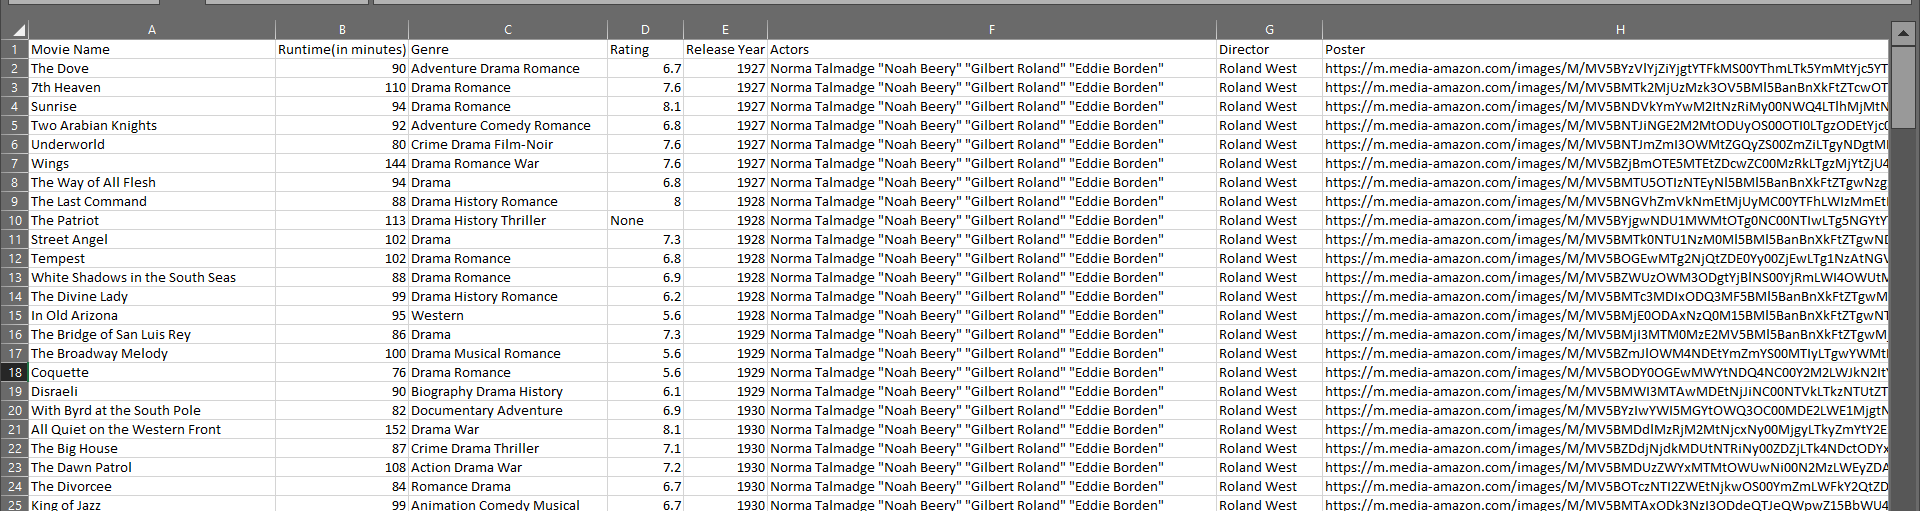


## How to run the code
You can execute the code using "Run" button at the top of this page or `Shift + Enter`. Also you can make changes and save your own version of the notebook to [Jovian](https://hub.binder.jovian.ai/user/1242sanjay/api-git-b1cccfa-5edb582b743c3_1-xtbg2hz7/notebooks/web-scrapping-project.ipynb#web-scrapping-project) by executing the following cells.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
import requests


In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="web-scrapping-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "1242sanjay/web-scrapping-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/1242sanjay/web-scrapping-project


'https://jovian.ai/1242sanjay/web-scrapping-project'

## 1. Download the webpage using `requests`

Here we installing the Python `requests` library and using it to fetch the webpage. 


In [5]:
# Install the library
!pip install requests --upgrade --quiet

Now the library is installed and imported.

We can use `get()` method from `requests`. The `get()` method of `requests` take page_url as input and returns a web object containing the data from web page and some other information.

In [6]:
url = 'https://www.imdb.com/search/title/?groups=oscar_winner&sort=year,asc'

In [7]:
response = requests.get(url)
type(response)

requests.models.Response

Here we checking the status of the response by `response.status_code`. If [HTTP status code](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) will have a value between 200 to 299 then the request is successful and we got successful response.

In [8]:
response.status_code

200

The request was successfull!.
Now we can use `response.text` to get the content of the page. Also let's check the no. of characters on the page.

In [9]:
page_content = response.text
len(page_content)

402703


The page_content contains over 4,10,000 characters!<br>
Here the first 500 characters which the webpage containing. 

In [10]:
page_content[:500]

'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

This above content is [HTML source code](https://www.w3schools.com/html/). Now we save this page_content into a HTML file.

In [11]:
with open('Oscar_winning_movie.html', 'w', encoding = 'utf-8') as f:
    f.write(page_content)

This is how the page looks like.

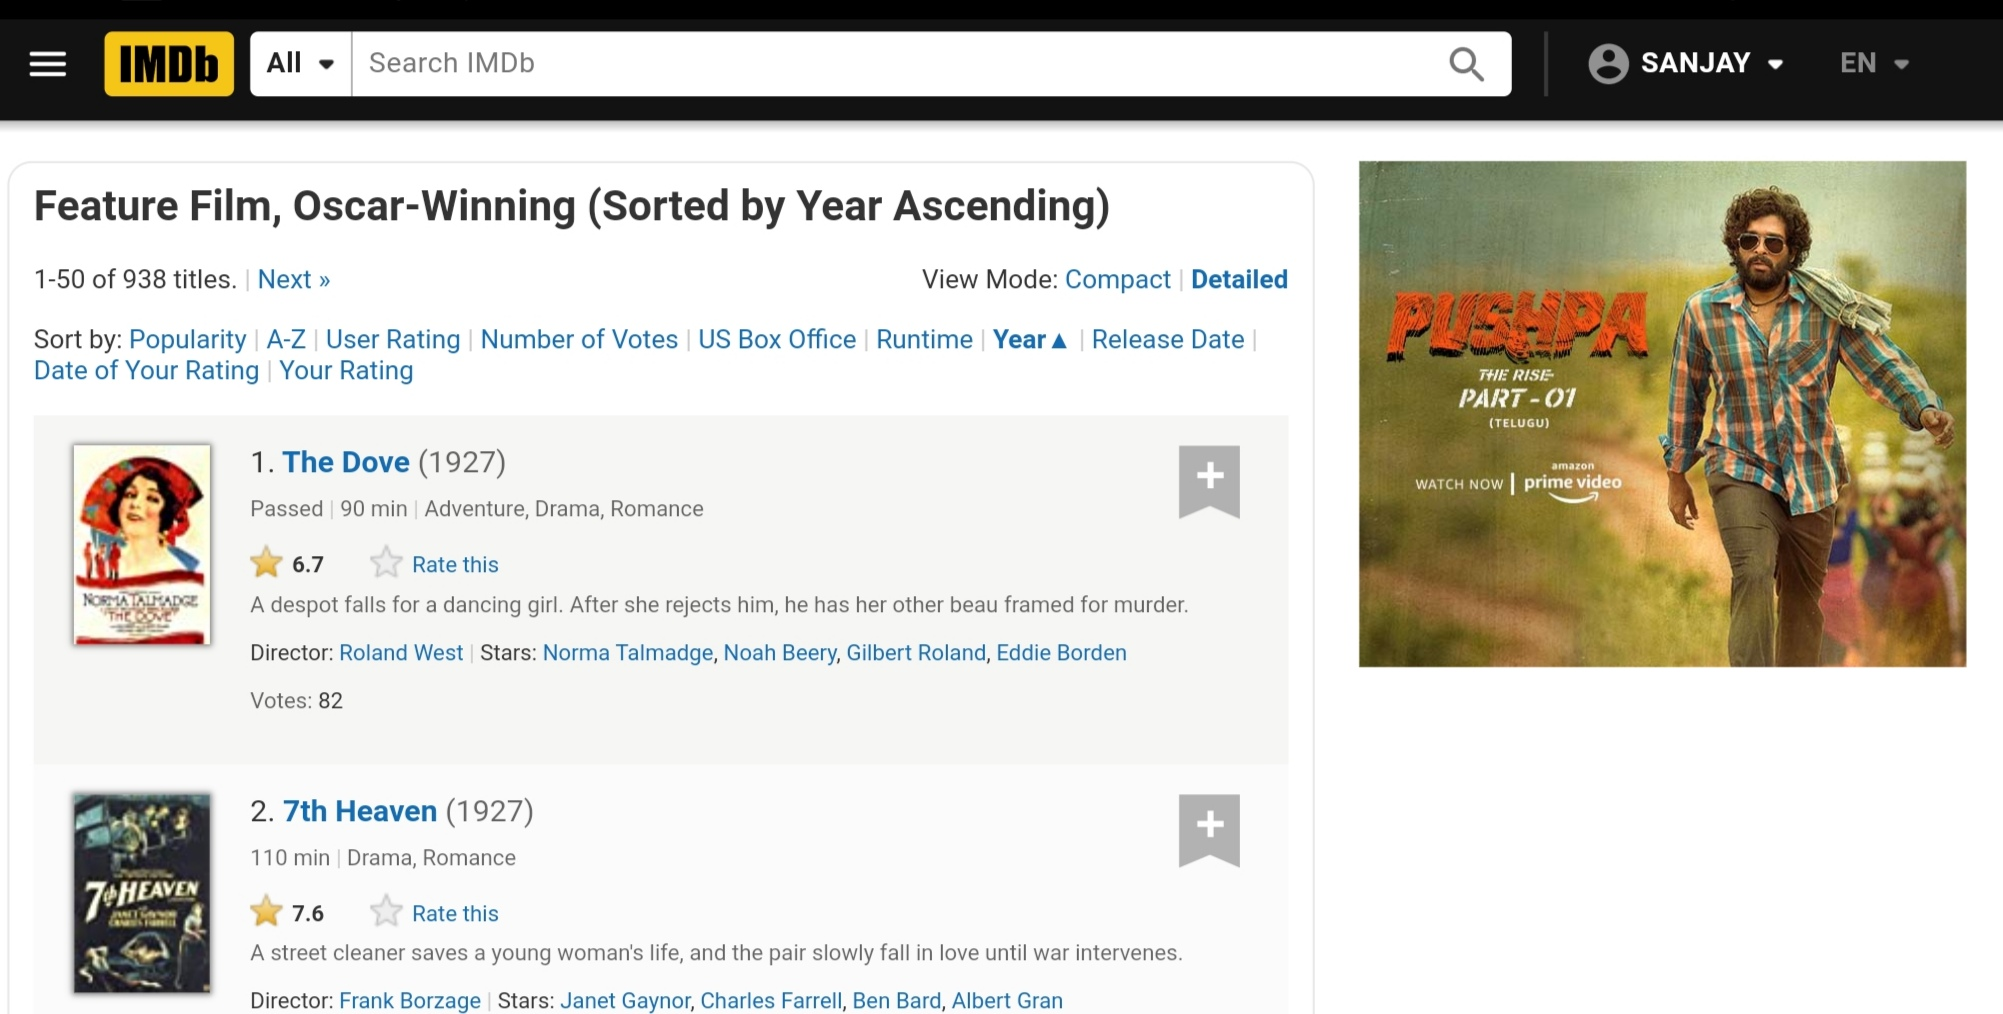

### 1.1. Converting into function
Here we combine all above steps and create a function which takes page_url as input and return the page content as output.

In [12]:
def fetch_page(page_url):
    """
        This function takes page_url as argument and returns content of the page
        and some other information as output. This function uses requests.get() method
        for extracting the page content.
    """
    # fetch the url and getting the response
    response = requests.get(page_url)
    # If status_code is 200 then we got proper data otherwise there somthing wrong
    if response.status_code != 200:
        raise Exception('Somthing went wrong while fetching the page')
    return response.text

In this section, we used the requests library to download webpage as HTML.

## 2. Parse the HTML source code using `BeautifulSoup`

Now we have to parse the web page which we downloaded in above section. So for the web page we use Python [beautifulsoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library.Here we will install the library and import it.

In [13]:
# Install the library
!pip install beautifulsoup4 --upgrade --quiet

In [14]:
from bs4 import BeautifulSoup

The library is installed and imported. Now we can open the HTML file in read mode and read the content of the file.

In [15]:
with open('Oscar_winning_movie.html', 'r') as f:
    html_content = f.read()

In [16]:
html_content[0:1000]

'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Oscar-Winning\n(Sorted by Year Ascending) - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex == \'function\') {\n      uex("ld", "LoadTitle", {wb: 1});\n    }\n</script>\n\n   

We'll use the `BeautifulSoup` library and pass the downloaded page content to it and it return a BeautifulSoup object document. And the type of this document is "bs4.BeautifulSoup".

In [17]:
# doc = BeautifulSoup(html_content, 'html.parser')
doc = BeautifulSoup(page_content)

In [18]:
type(doc)

bs4.BeautifulSoup

Now we this document is ready and we can parse data from this document. now we can use different properties and method to extract data from this document.

For example - 
    Here we extracting title of the document by using `doc.title`

In [19]:
doc.title

<title>Oscar-Winning
(Sorted by Year Ascending) - IMDb</title>

### 2.1. Converting into function

We'll combine all steps of this section and convert it into a function. This function takes input a page_content and returns a `BeautifulSoup` document.

In [20]:
def get_doc(page_content):
    """
        This function takes a HTML, XML page as a argument and 
        returns a BeautifulSoup document for this page.
    """
    doc = BeautifulSoup(page_content)
    return doc

## 3. Extract Movie Name, Runtime, Genre, Rating, Release year, Actors, Director and Poster from the page

In this section first we'll extract all the movies `div`. Once we got all movies then we will start extracting the data from each movie like movie_name, runtime, genre, rating, release_year, actors, director and also poster of the movie. 

### 3.1. Finding movies Items

We'll extract all the movies `div` using `doc.find_all()` method and `class = 'lister-item mode-advanced'`. This will give us list of all movies on the document. here we'll check the no. of movies extracted by the document using `len(movie_items)`.

In [21]:
movie_items = doc.find_all('div', class_='lister-item mode-advanced')

In [22]:
len(movie_items)

50

In [23]:
type(movie_items)

bs4.element.ResultSet

Here how the first movie item looks like

In [24]:
movie_items[0]

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt0017822"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt0017822/"> <img alt="The Dove" class="loadlate" data-tconst="tt0017822" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzVlYjZiYjgtYTFkMS00YThmLTk5YmMtYjc5YTFjZjM3YzAwXkEyXkFqcGdeQXVyNjcwNzI5MTM@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt0017822/">The Dove</a>
<span class="lister-item-year text-muted unbold">(1927)</span>
</h3>
<p class="text-muted">
<span class="certificate">Passed</span>
<span class="ghost">|</span>
<span class="runtime">90 min</span>
<span class="ghost">|</span>
<span class="genre">
Adventure, Drama, Romance       

Here We got all the `movie_items` and above we saw how the each movies looks like by printing first movie item.

Now we'll extract the data like Movie_name, runtime, genre, rating, release_year, actors, director and poster one by one. Here we'll extract these data for first movie and after this we'll define a function which extract these data for all the movies.


### 3.2. Extracting poster of movie, runtime and rating
Here we'll extract the poster of the movie. The poster is in `img` tag and its contain `class = "loadlate"` so we can get the movie poster by using this class name.

In [25]:
poster_url = movie_items[0].img['loadlate']
poster_url

'https://m.media-amazon.com/images/M/MV5BYzVlYjZiYjgtYTFkMS00YThmLTk5YmMtYjc5YTFjZjM3YzAwXkEyXkFqcGdeQXVyNjcwNzI5MTM@._V1_UX67_CR0,0,67,98_AL_.jpg'

Runtime of movie is inside `span` tag and the `class='runtime'` so we can get runtime of the movie using `find()` method.

In [26]:
runtime = movie_items[0].find('span', class_ = 'runtime').text.split(" ")[0]
runtime

'90'

Rating of the movie inside `strong` tag so we can get rating of movie by using `.text` property.

In [27]:
rating = movie_items[0].strong.text
rating

'6.7'

Inside this subsection we extract the poster, runtime and rating of movie.

### 3.3. Extracting genre 
Genre of movie is inside `span` tag and the `class='genre'` so we can extract genre of movie using `find()` method.

In [28]:
genre = movie_items[0].find('span', class_ = 'genre').text.strip('\n').split(',')
movie_genre = ''
for gen in genre:
    movie_genre += '{} '.format(gen.strip(' '))
movie_genre

'Adventure Drama Romance '

#### 3.3.1. converting into function

Now let convert this into a function which will take input a movie_item and return the genre of the movie.

In [29]:
def find_genre(movie_item):
    """
        This function takes HTML document form of a movie item and
        extract Genre of the movie and return the genre.
    """
    # find the genre, splitting and storing the list of genre
    genre = movie_item.find('span', class_ = 'genre').text.strip('\n').split(',')
    movie_genre = ''
    # converting the list of genre in string seperated by space
    for gen in genre:
        movie_genre += '{} '.format(gen.strip(' '))
    return movie_genre

In [30]:
find_genre(movie_items[0])

'Adventure Drama Romance '

In this subsection we extracted the genre of the movie from the movie item.

### 3.4. Extracting movie name and release year
Each movie contain a `h3` tag and inside this movie name and release year is present.

In [31]:
movie_items[0].find('h3')

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt0017822/">The Dove</a>
<span class="lister-item-year text-muted unbold">(1927)</span>
</h3>

But some of the movie containing the parts also which is mentioned in the `span` tag with year so we need to extract this parts also and [cancatinate](https://www.educative.io/edpresso/how-to-concatenate-strings-in-python) with the movie name.

In [32]:
movie_items[26].find('h3')

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">27.</span>
<a href="/title/tt0021730/">The Champ</a>
<span class="lister-item-year text-muted unbold">(I) (1931)</span>
</h3>

Here we first find the `h3` tag section and then choose `a` tag and then apply `.text` property to get the movie title. 

In [33]:
movie_title = movie_items[26].find('h3')
movie_title.a.text

'The Champ'

We found the movie title using above code but here we need to include movie part also so we get `span` tag and split it with space and if we got the list length more than 1 then definitely movie has part. We extract part and concatinate with title so we got full movie name.

And also we'll extracted year from here.

In [34]:
part_year = movie_items[26].find('h3').find('span', class_ = 'lister-item-year text-muted unbold').text.split(' ')
parts = len(part_year)>1
if(parts):
    movie_title = movie_items[26].find('h3').a.text + " " + part_year[0][1:-1]
    year = part_year[1][1:-1]
else:
    movie_title = movie_items[26].find('h3').a.text
    year = part_year[0][1:-1]

In [35]:
movie_title, year

('The Champ I', '1931')

#### 3.4.1 Converting into function
Now let's combine these and create a function which will take a movie_h3 document and return movie_title, and release_year.

In [36]:
def movie_title_and_year(doc):
    """
        This function takes HTML document form of a movie item as input and 
        return the title and the release year of the movie.
    """
    # Getting the parts and year from document
    parts_year = doc.find('span', class_ = 'lister-item-year text-muted unbold').text.split(' ')
    # Extracting the movie title
    movie_title = doc.a.text
    year = ''
    if len(parts_year)>1:
        # if the movie has parts then it concat part with movie title
        title = movie_title + " " + parts_year[0][1:-1]
        # extracting year from parts and year
        year = parts_year[1][1:-1]
    else:
        # If the movie do not have parts then it simply give the movie title
        title = movie_title
        # extracting year from year and parts when movie do not have part
        year = parts_year[0][1:-1]
    return title, year

In [37]:
movie_h3 = movie_items[26].find('h3')
movie_title_and_year(movie_h3)

('The Champ I', '1931')

In this subsection we extracted title and release_year of the movie.

### 3.5. Extracting actors and director
The director and actors of the movie are inside a `p` tag and the `class=''` se we can use `.find()` method and `.text` property this returns a string contain Director and Actors seperated by "|". So we can extract the director and actors of movie seperately. Here we use [`.split()`](https://www.w3schools.com/python/ref_string_split.asp) method to split the string and [`.strip()`](https://www.w3schools.com/python/ref_string_strip.asp) method to remove unwanted characters from left and right of a string. 

In [38]:
cast = movie_items[0].find('p', class_ = '')
director = ''
stars = ''
if len(cast.text.split('|'))>1:
    director = cast.text.split('|')[0].split(':')[-1].strip('\n')
    star_list = cast.text.split('|')[1].split(':')[1].split(',')
    for star in star_list:
        stars += '"{}" '.format(star.strip(' ').strip('\n'))
else:
    star_list = cast.find_all('a')
    for star in star_list:
        stars += '"{}" '.format(star.text)
director, stars

('Roland West',
 '"Norma Talmadge" "Noah Beery" "Gilbert Roland" "Eddie Borden" ')

#### 3.5.1 converting into function
Now let's convert it into a function which will take `p` tag document of movie as input and return Actors and director as output.

In [39]:
def director_and_actor(doc):
    """
        This function take HTML document form of cast as input and extract director and actors of 
        the movie and return them.
    """
    director = ''
    stars = ''
    if len(cast.text.split('|'))>1:
        # Extracting director
        director = cast.text.split('|')[0].split(':')[-1].strip('\n')
        # Extracting Actors
        star_list = cast.text.split('|')[1].split(':')[1].split(',')
        for star in star_list:
            stars += '"{}" '.format(star.strip(' ').strip('\n'))
    else:
        star_list = cast.find_all('a')
        for star in star_list:
            stars += '"{}" '.format(star.text)
    return director, stars

In [40]:
cast = movie_items[0].find('p', class_ = '')
director_and_actor(cast)

('Roland West',
 '"Norma Talmadge" "Noah Beery" "Gilbert Roland" "Eddie Borden" ')

In this subsection we extracted the director and actors list from the movie

### 3.6. Extract the data from the movie items
Now lets combine all the above subsections and create a function using these subsections for extract the data from movie. This function takes `movie` as input and return the required data which we need.

In [41]:
def finding_movie_data(movie_item):
    """
        This function takes HTML document form of a movie item as input and 
        return a dictionary of data Movie Name, Runtime, Genre, Rating, Release Year, Actors, Director and poster.
    """
    # Extracting poster
    poster = movie_item.img['loadlate']
    # getting movie title and  release year through calling function movie_title_and_year
    title, year = movie_title_and_year(movie_item.find('h3'))
    # Extracting movie runtime
    runtime = 'None' if movie_item.find('span', class_ = 'runtime')==None else movie_item.find('span', class_ = 'runtime').text.split(" ")[0]
    # Getting genre of movie through calling function find_genre
    genre = find_genre(movie_item)
    # Extracting rating of movie
    rating = 'None' if movie_item.strong == None else movie_item.strong.text
    # getting director and actors of the movie through calling function director_and_actors
    director, actors = director_and_actor(movie_item.find('p', class_ = ''))
    # Returning a dictionary of movie data
    return {
        'Movie Name' : title,
        'Runtime(in minutes)' : runtime,
        'Genre' : genre,
        'Rating' : rating,
        'Release Year' : year,
        'Actors' : actors,
        'Director' : director,
        'Poster' : poster
    }

In [42]:
finding_movie_data(movie_items[0])

{'Movie Name': 'The Dove',
 'Runtime(in minutes)': '90',
 'Genre': 'Adventure Drama Romance ',
 'Rating': '6.7',
 'Release Year': '1927',
 'Actors': '"Norma Talmadge" "Noah Beery" "Gilbert Roland" "Eddie Borden" ',
 'Director': 'Roland West',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BYzVlYjZiYjgtYTFkMS00YThmLTk5YmMtYjc5YTFjZjM3YzAwXkEyXkFqcGdeQXVyNjcwNzI5MTM@._V1_UX67_CR0,0,67,98_AL_.jpg'}

## 4. Store the extracted information into Python lists and dictionary

Now we can extract the data for all the movie by applying a loop over `movie_items` and store these data into a list.

In [43]:
movie_data_list = []
for movie in movie_items:
    movie_data_list.append(finding_movie_data(movie))

Here first three elements of `movie_data_list` are looks like.

In [44]:
movie_data_list[:3]

[{'Movie Name': 'The Dove',
  'Runtime(in minutes)': '90',
  'Genre': 'Adventure Drama Romance ',
  'Rating': '6.7',
  'Release Year': '1927',
  'Actors': '"Norma Talmadge" "Noah Beery" "Gilbert Roland" "Eddie Borden" ',
  'Director': 'Roland West',
  'Poster': 'https://m.media-amazon.com/images/M/MV5BYzVlYjZiYjgtYTFkMS00YThmLTk5YmMtYjc5YTFjZjM3YzAwXkEyXkFqcGdeQXVyNjcwNzI5MTM@._V1_UX67_CR0,0,67,98_AL_.jpg'},
 {'Movie Name': '7th Heaven',
  'Runtime(in minutes)': '110',
  'Genre': 'Drama Romance ',
  'Rating': '7.6',
  'Release Year': '1927',
  'Actors': '"Norma Talmadge" "Noah Beery" "Gilbert Roland" "Eddie Borden" ',
  'Director': 'Roland West',
  'Poster': 'https://m.media-amazon.com/images/M/MV5BMTk2MjUzMzk3OV5BMl5BanBnXkFtZTcwOTk1MjQxMw@@._V1_UX67_CR0,0,67,98_AL_.jpg'},
 {'Movie Name': 'Sunrise',
  'Runtime(in minutes)': '94',
  'Genre': 'Drama Romance ',
  'Rating': '8.1',
  'Release Year': '1927',
  'Actors': '"Norma Talmadge" "Noah Beery" "Gilbert Roland" "Eddie Borden" ',
  'Di

In [45]:
def finding_movie_data_list(movie_items):
    movie_data = []
    for movie in movie_items:
        movie_data.append(finding_movie_data(movie))
    return movie_data

In [46]:
movie_data_list = finding_movie_data_list(movie_items)

In [47]:
len(movie_data_list)

50

In [48]:
type(movie_data_list)

list

## 5. Save the extracted information into a CSV file
Now we have the movies data in a list of dictionaries. So let us write and save this data into a csv file. For this we have to open the file in write mode and write this data into the file one by one.

Before writing data into the csv file first we will check that we have data to write in the file or not. If we have data then we write that data into the file otherwise we will not write the data into the file.

In [49]:
data = movie_data_list
# first check we have data or not
if len(data)>0:
    # open the file in write mode
    with open('data.csv', 'w') as f:
        # Write the headers in first line
        headers = list(data[0].keys())
        f.write(','.join(headers)+'\n')
        # Now write the movie data line by line
        for item in data:
            values = []
            for header in headers:
                values.append(str(item.get(header, "")))
            f.write(','.join(values)+"\n")
    print("Data is written in the file successfully...")
else:
    print("There is no data to write")

Data is written in the file successfully...


Now let's write a function which will take movies_data_list and the path of the file as argument and write the data in the csv file.

In [50]:
def write_csv(movie_data_list, path):
    # Open the file in write mode
    with open(path, 'w') as f:
        # Return if there's nothing to write
        if len(movie_data_list) == 0:
            return
        # Write the headers in the first line
        headers = list(movie_data_list[0].keys())
        f.write(','.join(headers) + '\n')
        
        # Write one item per line
        for item in movie_data_list:
            values = []
            for header in headers:
                values.append(str(item.get(header, "")))
            f.write(','.join(values)+"\n")

In [51]:
write_csv(movie_data_list, 'movie_data.csv')

Finally we got the movie data and stored it into csv file. But this above solution works for only one page. So now we will combine all the function and extract data for given number of pages.

## Now combine all the function and extract the data for given no. of pages
Now we will combine all the created function and extract the oscar winner movie data from IMDb for a given no. of pages. 

In [52]:
def fetch_page(page_url):
    """
        This function takes page_url as argument and returns content of the page
        and some other information as output. This function uses requests.get() method
        for extracting the page content.
    """
    # fetch the url and getting the response
    response = requests.get(page_url)
    # If status_code is 200 then we got proper data otherwise there somthing wrong
    if response.status_code != 200:
        raise Exception('Somthing went wrong while fetching the page')
    return response.text


def get_doc(page_content):
    """
        This function takes a HTML page as a argument and 
        returns a BeautifulSoup document for this page.
    """
    doc = BeautifulSoup(page_content)
    return doc


def find_genre(movie_item):
    """
        This function takes HTML document form of a movie item and
        extract Genre of the movie and return the genre.
    """
    # find the genre, splitting and storing the list of genre
    genre = movie_item.find('span', class_ = 'genre').text.strip('\n').split(',')
    movie_genre = ''
    # converting the list of genre in string seperated by space
    for gen in genre:
        movie_genre += '{} '.format(gen.strip(' '))
    return movie_genre



def movie_title_and_year(doc):
    """
        This function takes HTML document form of a movie item as input and 
        return the title and the release year of the movie.
    """
    # Getting the parts and year from document
    parts_year = doc.find('span', class_ = 'lister-item-year text-muted unbold').text.split(' ')
    # Extracting the movie title
    movie_title = doc.a.text
    year = ''
    if len(parts_year)>1:
        # if the movie has parts then it concat part with movie title
        title = movie_title + " " + parts_year[0][1:-1]
        # extracting year from parts and year
        year = parts_year[1][1:-1]
    else:
        # If the movie do not have parts then it simply give the movie title
        title = movie_title
        # extracting year from year and parts when movie do not have part
        year = parts_year[0][1:-1]
    return title, year


def director_and_actor(doc):
    """
        This function take HTML document form of cast as input and extract director and actors of 
        the movie and return them.
    """
    director = ''
    stars = ''
    if len(cast.text.split('|'))>1:
        # Extracting director
        director = cast.text.split('|')[0].split(':')[-1].strip('\n')
        # Extracting Actors
        star_list = cast.text.split('|')[1].split(':')[1].split(',')
        for star in star_list:
            stars += '"{}" '.format(star.strip(' ').strip('\n'))
    else:
        star_list = cast.find_all('a')
        for star in star_list:
            stars += '"{}" '.format(star.text)
    return director, stars



def finding_movie_data(movie_item):
    """
        This function takes HTML document form of a movie item as input and 
        return a dictionary of data Movie Name, Runtime, Genre, Rating, Release Year, Actors, Director and poster.
    """
    # Extracting poster
    poster = movie_item.img['loadlate']
    # getting movie title and  release year through calling function movie_title_and_year
    title, year = movie_title_and_year(movie_item.find('h3'))
    # Extracting movie runtime
    runtime = 'None' if movie_item.find('span', class_ = 'runtime')==None else movie_item.find('span', class_ = 'runtime').text.split(" ")[0]
    # Getting genre of movie through calling function find_genre
    genre = find_genre(movie_item)
    # Extracting rating of movie
    rating = 'None' if movie_item.strong == None else movie_item.strong.text
    # getting director and actors of the movie through calling function director_and_actors
    director, actors = director_and_actor(movie_item.find('p', class_ = ''))
    # Returning a dictionary of movie data
    return {
        'Movie Name' : title,
        'Runtime(in minutes)' : runtime,
        'Genre' : genre,
        'Rating' : rating,
        'Release Year' : year,
        'Actors' : actors,
        'Director' : director,
        'Poster' : poster
    }


def finding_movie_data_list(movie_items):
    """
        This function takes list of HTML document form of a movie item as input and
        return list of dictionaries which contain movie data.
    """
    movie_data = []
    for movie in movie_items:
        movie_data.append(finding_movie_data(movie))
    return movie_data


def write_csv(movie_data_list, path):
    """
        This function takes list of dictionaries of movie data and the path of csv file 
        and store the data into the csv file and return boolean value.
    """
    # Open the file in write mode
    with open(path, 'w') as f:
        # Return if there's nothing to write
        if len(movie_data_list) == 0:
            return
        # Write the headers in the first line
        headers = list(movie_data_list[0].keys())
        f.write(','.join(headers) + '\n')
        
        # Write one item per line
        for item in movie_data_list:
            values = []
            for header in headers:
                values.append(str(item.get(header, "")))
            f.write(','.join(values)+"\n")
        return True
    return False

In [53]:
def scrape_imdb(pages, path):
    """
        This function takes url, number of pages, and the path of csv file and extract
        movies data for given number of pages and store the data into csv file.
    """
    
    url = 'https://www.imdb.com/search/title/?title_type=feature&groups=oscar_winner&sort=year,asc'
    movie_data_list = []
   # Extracting the data for given number of pages
    for page in range(pages):
        # Preparing url for each page
        url += '&start={}&ref_=adv_nxt'.format(1+page*50)
        # getting the content of the page
        page_content = fetch_page(url)
        # getting a BeautifulSoup document
        doc = get_doc(page_content)
        # getting the all movie doc for the page 
        movie_items = doc.find_all('div', class_='lister-item mode-advanced')
        # getting the movie data for the page
        movie_data = finding_movie_data_list(movie_items)
        # storing all the movie data for each page
        movie_data_list += movie_data
    # Now we find the movie data for all given number of pages and saving the data into the csv file.
    status = write_csv(movie_data_list, path)
    if(status):
        print("Data extracted and written in csv file successfully...")
    else:
        print("Somthing went wrong while writing data in csv.")

In [55]:
# Calling the scrape_imdb for 5 pages
scrape_imdb(5, 'oscar_winner.csv')

Data extracted and written in csv file successfully...


In [ ]:
jovian.commit(files=['movie_data.csv', 'oscar_winner.csv'])

<IPython.core.display.Javascript object>

## Summary
In this project we scrapped IMDb website to extract oscar award winner movie in ascending order of their release year. This project extracted movie data for given n number of pages and save this data to a given csv file. For scrapping this IMDb website we used Python programming language. We used `requests` and `BeautifulSoup` library of python.

## References
1. What is web scrapping : https://www.zyte.com/learn/what-is-web-scraping/
2. IMDb website : https://imdb.com/
3. What is Oscar Award : https://en.wikipedia.org/wiki/Academy_Awards
4. Python `requests` library documentation : https://requests.readthedocs.io/en/latest/
5. `requests` W3school : https://www.w3schools.com/python/module_requests.asp
6. BeautifulSoup library documentation : https://www.crummy.com/software/BeautifulSoup/bs4/doc/
7. Know more about CSV file - Wikipedia : https://en.wikipedia.org/wiki/Comma-separated_values
8. HTTP status code : https://developer.mozilla.org/en-US/docs/Web/HTTP/Status
9. You can find this jupyter notebook here : https://hub.binder.jovian.ai/user/1242sanjay/api-git-b1cccfa-5edb582b743c3_1-xtbg2hz7/notebooks/web-scrapping-project.ipynb#web-scrapping-project


## Future Work
* To make this scrapper more flexible by adding features - Extract data genre wise, country wise, by language, by rating so that we can use this scrapper to scrape data from each category.
* Perform Exploratory Data analysis on this data.
* Creating a Machine learning model to classify new movies for oscar nomination.

In [ ]:
jovian.commit()